In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir(os.getcwd())

In [3]:
df = pd.read_csv("train.csv")

In [4]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (8693, 14)


In [5]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()



,unique count
PassengerId,8693
HomePlanet,3
CryoSleep,2
Cabin,6560
Destination,3
Age,80
VIP,2
RoomService,1273
FoodCourt,1507
ShoppingMall,1115


In [8]:
cat_cols = ['HomePlanet','CryoSleep', 'Destination', 'VIP']
con_cols = ["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
target_col = ["Transported"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
The continuous cols are :  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
The target variable is :   ['Transported']


In [9]:
df[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [10]:
df[cat_cols].describe().transpose()

,count,unique,top,freq
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291


In [11]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [12]:
df.drop("Name",axis=1,inplace=True)

In [13]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(8693, 13)
(6764, 13)


In [14]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [15]:
df['PassengerId'].str.split('_', expand=True)

,0,1
0,0001,01
1,0002,01
2,0003,01
3,0003,02
4,0004,01
...,...,...
8688,9276,01
8689,9278,01
8690,9279,01
8691,9280,01


In [16]:
df[['group_number','passenger_number']] = df['PassengerId'].str.split('_', expand=True)
# display the dataframe
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,group_number,passenger_number
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01


In [17]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()



,unique count
PassengerId,6764
HomePlanet,3
CryoSleep,2
Cabin,5413
Destination,3
Age,80
VIP,2
RoomService,1112
FoodCourt,1318
ShoppingMall,1000


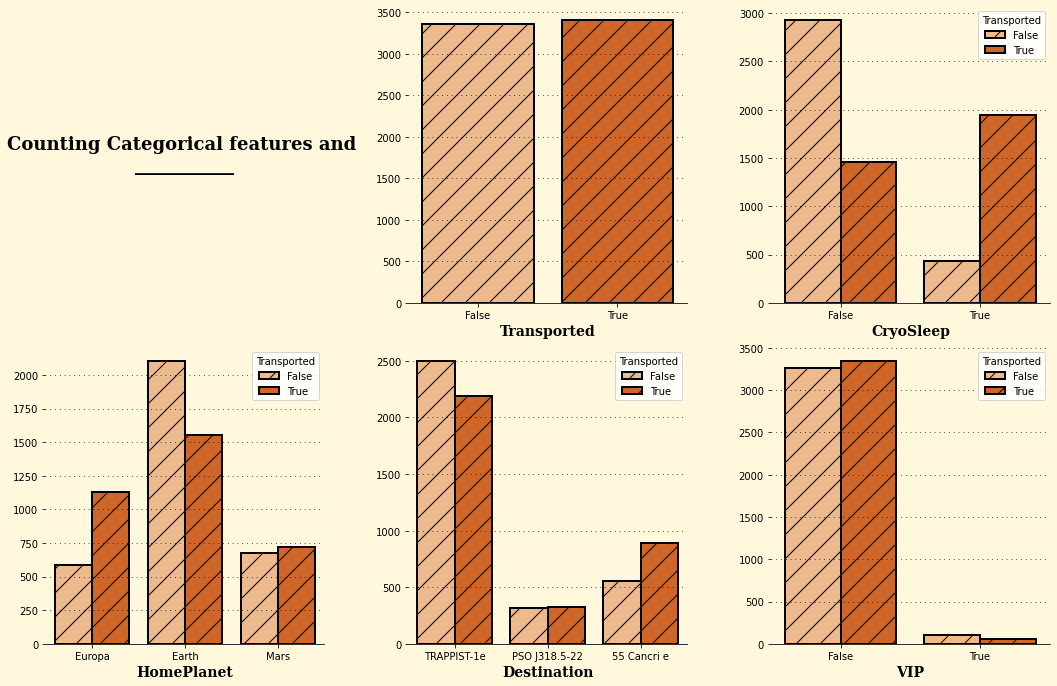

In [140]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[-2,0])

background_color = "#FFF8DC"

fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Counting Categorical features and \n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# performance of each field Count

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x='Transported',palette = 'Oranges',edgecolor='black',**{'hatch':'/','linewidth':2})
ax1.set_xlabel("Transported",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2, data=df, x='CryoSleep',palette = 'Oranges', hue='Transported',edgecolor='black',**{'hatch':'/','linewidth':2})
ax2.set_xlabel("CryoSleep",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3, data=df, x='Destination',palette = 'Oranges',hue='Transported',edgecolor='black',**{'hatch':'/','linewidth':2})
ax3.set_xlabel("Destination",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4, data=df, x='VIP',palette = 'Oranges',hue='Transported',edgecolor='black',**{'hatch':'/','linewidth':2})
ax4.set_xlabel("VIP",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5, data=df, x='HomePlanet',palette = 'Oranges',hue='Transported',edgecolor='black',**{'hatch':'/','linewidth':2})
ax5.set_xlabel("HomePlanet",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.set_ylabel("",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)

ax4.spines["top"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["right"].set_visible(False)

ax5.spines["top"].set_visible(False)
ax5.spines["left"].set_visible(False)
ax5.spines["right"].set_visible(False)

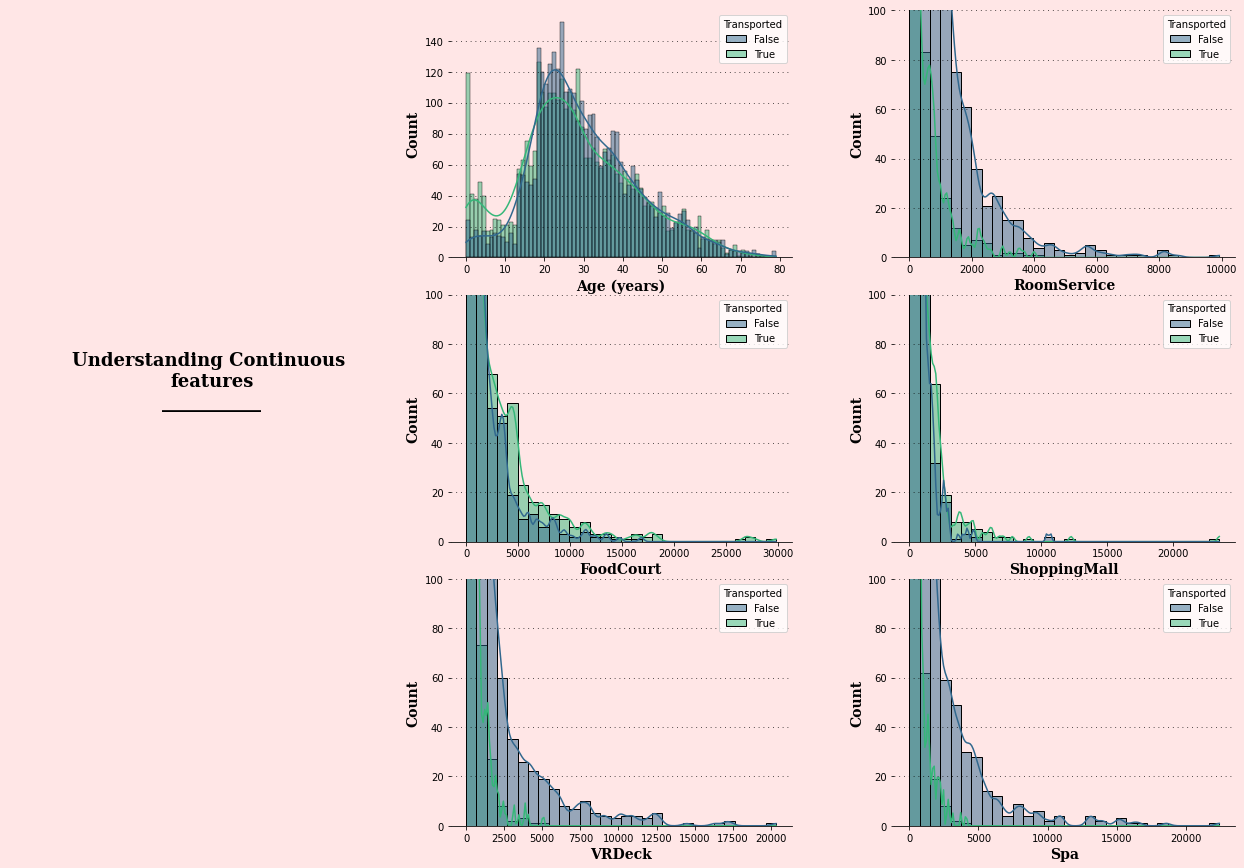

In [185]:
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[1,2])
ax5 = fig.add_subplot(gs[2,2])
ax6 = fig.add_subplot(gs[2,1])

background_color = "#ffe6e6"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color) 
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.6,-0.5,"Understanding Continuous \nfeatures\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# performance of each field Count

ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax1, data=df, x = 'Age', hue="Transported",palette = 'viridis', binwidth=1, kde=True)
ax1.set_xlabel("Age (years)",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")


ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax2, data=df, x = 'RoomService', hue="Transported",palette = 'viridis', bins=30, kde=True)
ax2.set_xlabel("RoomService",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax2.set_ylim(0,100)

ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax3, data=df, x = 'FoodCourt', hue="Transported",palette = 'viridis', bins=30, kde=True)
ax3.set_xlabel("FoodCourt",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax3.set_ylim(0,100)

ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax4, data=df, x = 'ShoppingMall', hue="Transported",palette = 'viridis', bins=30, kde=True)
ax4.set_xlabel("ShoppingMall",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax4.set_ylim(0,100)

ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax5, data=df, x = 'Spa', hue="Transported",palette = 'viridis', bins=30, kde=True)
ax5.set_xlabel("Spa",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax5.set_ylim(0,100)

ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.histplot(ax=ax6, data=df, x = 'VRDeck', hue="Transported",palette = 'viridis', bins=30, kde=True)
ax6.set_xlabel("VRDeck",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.set_ylabel("Count",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax6.set_ylim(0,100)

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2.spines["top"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["right"].set_visible(False)

ax3.spines["top"].set_visible(False)
ax3.spines["left"].set_visible(False)
ax3.spines["right"].set_visible(False)

ax4.spines["top"].set_visible(False)
ax4.spines["left"].set_visible(False)
ax4.spines["right"].set_visible(False)

ax5.spines["top"].set_visible(False)
ax5.spines["left"].set_visible(False)
ax5.spines["right"].set_visible(False)

ax6.spines["top"].set_visible(False)
ax6.spines["left"].set_visible(False)
ax6.spines["right"].set_visible(False)